<a href="https://colab.research.google.com/github/gffiveash/DS4002/blob/main/4_Exploratory_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This script describes each EDA and analysis plot we created, including scatter plots, box plots, and a heat map.

In [1]:
# Clone to gitub
! git clone https://github.com/gffiveash/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 293, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 293 (delta 53), reused 5 (delta 5), pack-reused 189 (from 1)
Receiving objects: 100% (293/293), 966.59 KiB | 9.38 MiB/s, done.
Resolving deltas: 100% (126/126), done.


# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from datetime import datetime, timedelta
import re
import os
from google.colab import files

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('DS4002/DATA/Merged_Final_Data.csv')

df.head()


,Date,Location,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY
0,2020-01-01,"Charlottesville, VA",340,-0.25,-0.000,70,0.06,0.250
1,2020-01-01,"Martha Jefferson, VA",391,NaN,-0.100,6,NaN,-0.140
2,2020-01-01,"Fifeville, VA",204,NaN,0.180,5,NaN,0.000
3,2020-01-01,"Jefferson Park, VA",190,NaN,-0.260,7,NaN,0.400
4,2020-01-01,"Venable, VA",480,NaN,0.899,4,NaN,0.333


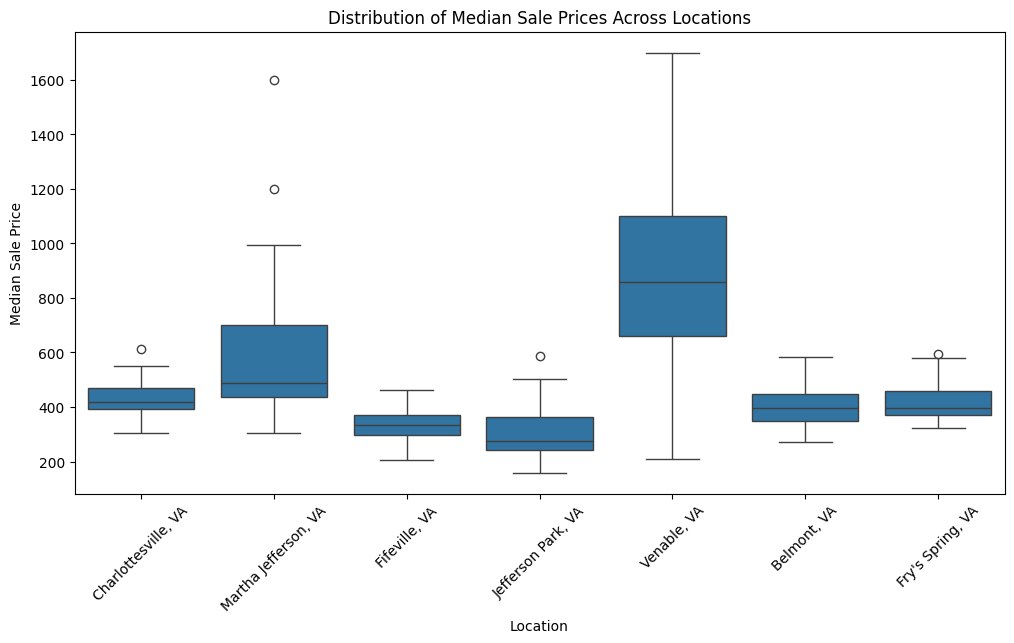

In [4]:
#Box plot of median sale prices

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Location", y="Median Sale Price")
plt.xticks(rotation=45)

plt.title("Distribution of Median Sale Prices Across Locations")
plt.xlabel("Location")
plt.ylabel("Median Sale Price")

plt.show()

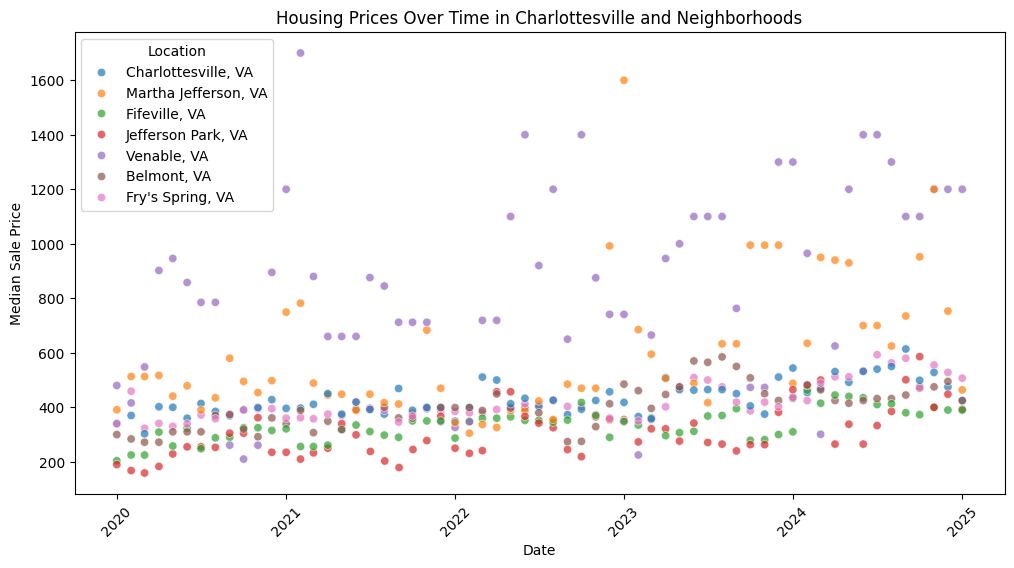

In [5]:
# Create scatterplot of prcies over time

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x="Date", y="Median Sale Price", hue="Location", alpha=0.7)

plt.title("Housing Prices Over Time in Charlottesville and Neighborhoods")
plt.xlabel("Date")
plt.ylabel("Median Sale Price")

plt.xticks(rotation=45)

plt.show()


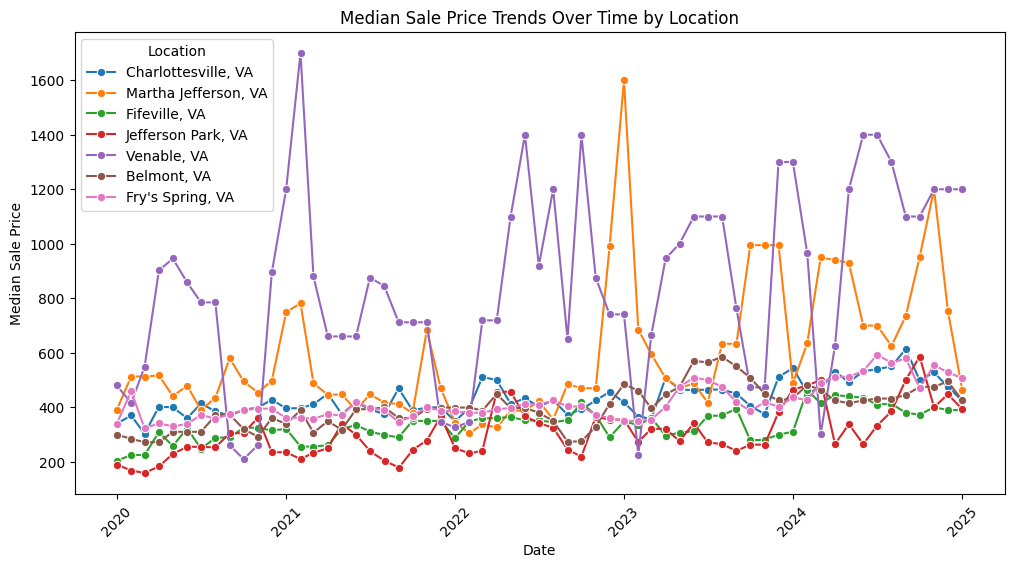

In [6]:
#Plot a line graph of sale trends over time for each location

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Median Sale Price", hue="Location", marker="o")

plt.title("Median Sale Price Trends Over Time by Location")
plt.xlabel("Date")
plt.ylabel("Median Sale Price")

plt.xticks(rotation=45)

plt.show()


In [7]:
# Create a summary of monthly stats of prices (mean, median, max, min, standard deviation)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year-Month'] = df['Date'].dt.to_period('M').astype(str)

monthly_stats = df.groupby('Year-Month').agg({
    'Median Sale Price': ['mean', 'median', 'min', 'max', 'std'],
    'Homes Sold': 'sum'  # Total number of homes sold per month
}).reset_index()

monthly_stats.columns = ['Year-Month', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Price Std Dev', 'Total Homes Sold']

print(monthly_stats)

monthly_stats.to_csv('Monthly_Housing_Summary.csv', index=False)

from google.colab import files
files.download('Monthly_Housing_Summary.csv')


   Year-Month  Mean Price  Median Price  Min Price  Max Price  Price Std Dev  \
0     2020-01  320.714286         340.0        190        480     101.811450   
1     2020-02  347.857143         370.0        168        513     126.674686   
2     2020-03  334.714286         303.0        159        548     144.490731   
3     2020-04  418.000000         341.0        183        902     237.579460   
4     2020-05  416.285714         330.0        229        946     245.066463   
..        ...         ...           ...        ...        ...            ...   
56    2024-09  622.142857         580.0        380       1100     240.698586   
57    2024-10  636.428571         499.0        373       1100     276.606132   
58    2024-11  679.714286         528.0        400       1200     360.174363   
59    2024-12  612.714286         495.0        390       1200     283.230009   
60    2025-01  543.285714         425.0        390       1200     292.454962   

    Total Homes Sold  
0               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

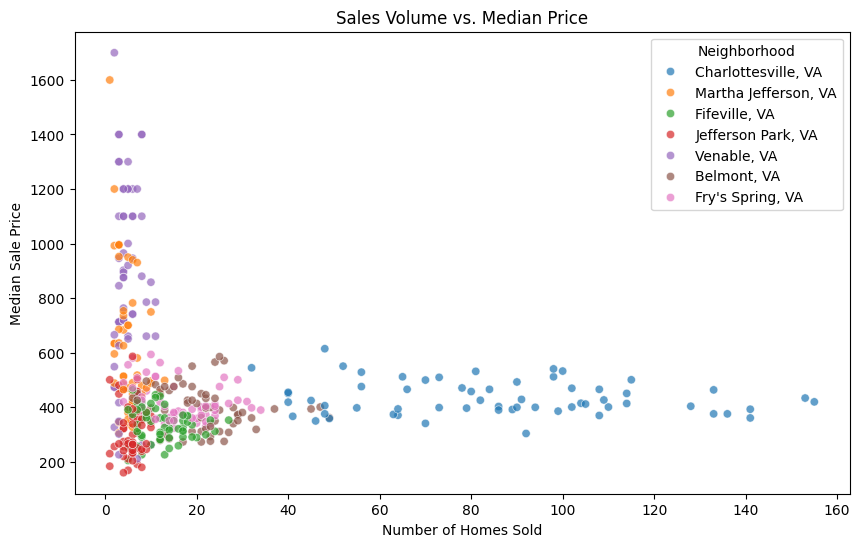

In [8]:
#plot scatter plot of number of homes sold in relation to median price of home sale
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Homes Sold", y="Median Sale Price", hue="Location", data=df, alpha=0.7)
plt.title("Sales Volume vs. Median Price")
plt.xlabel("Number of Homes Sold")
plt.ylabel("Median Sale Price")
plt.legend(title="Neighborhood", bbox_to_anchor=(1, 1))
plt.show()

In [9]:
# Seperate datetime into months and years
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year


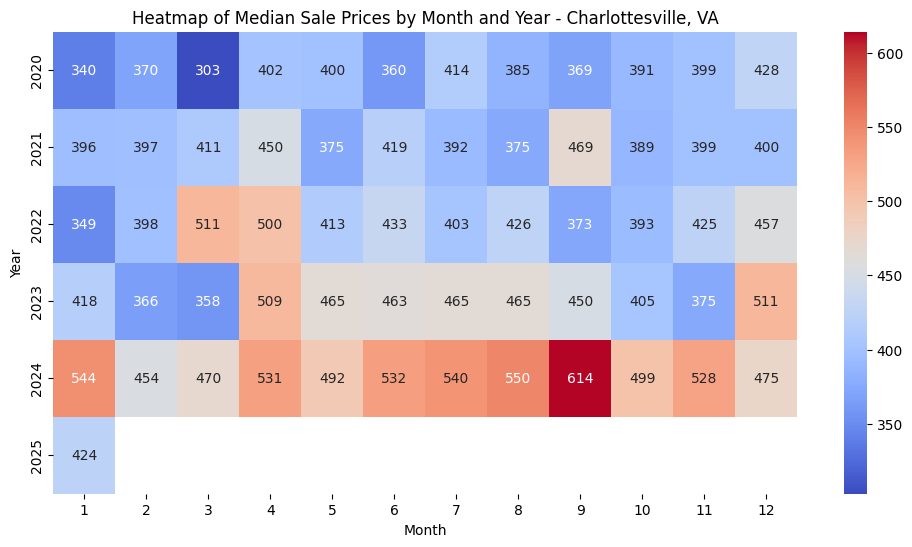

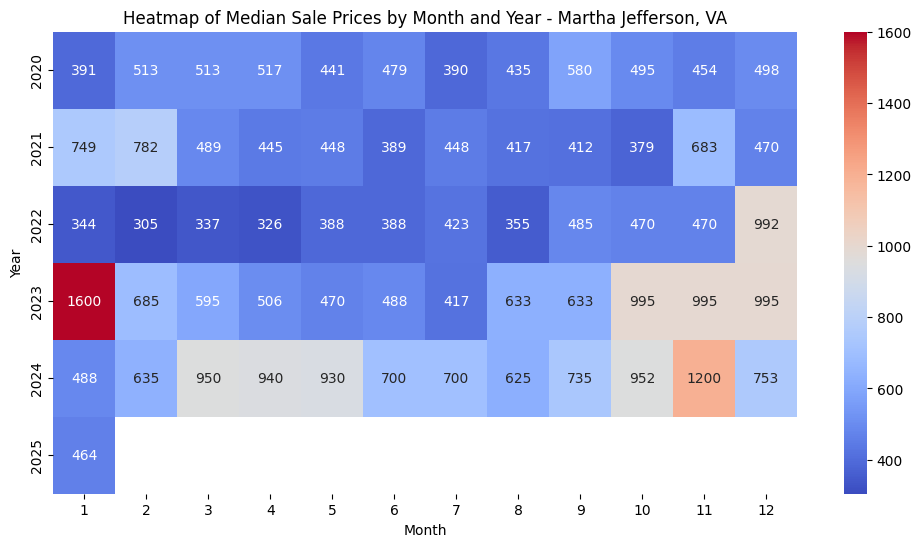

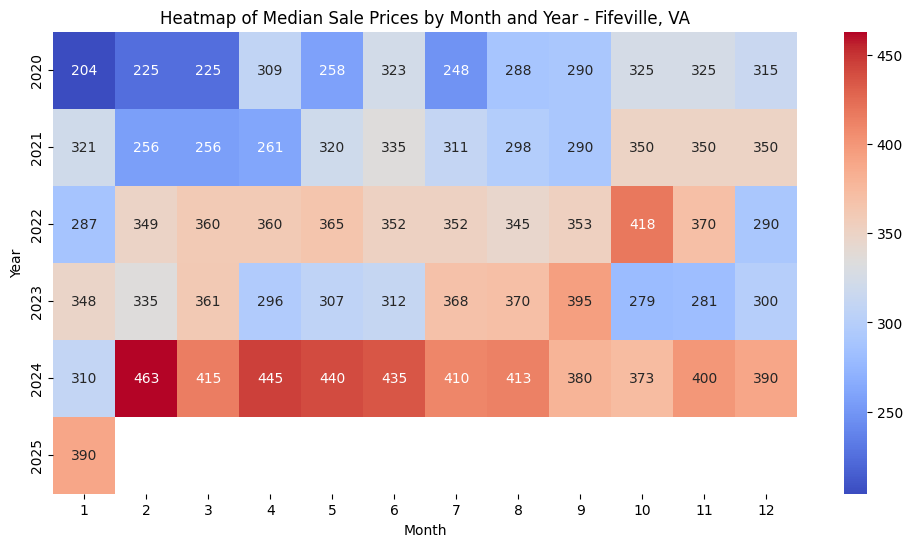

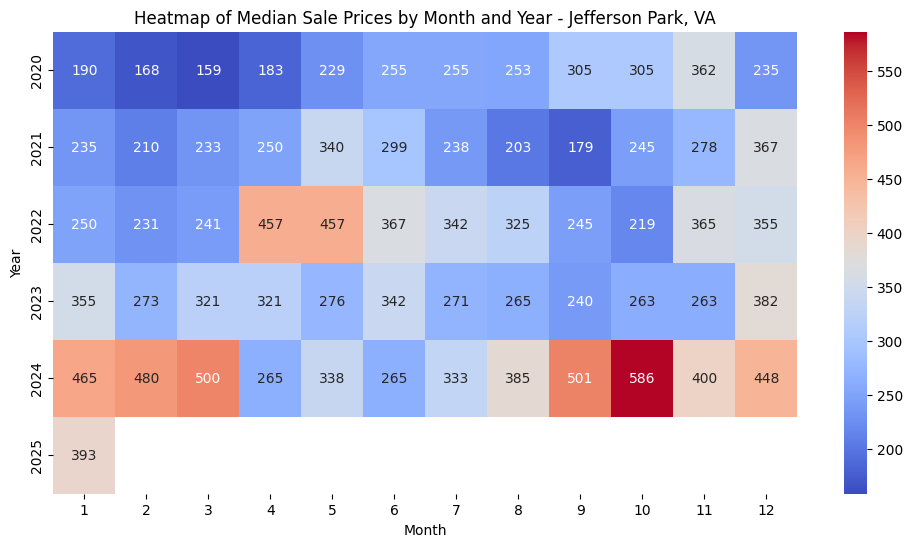

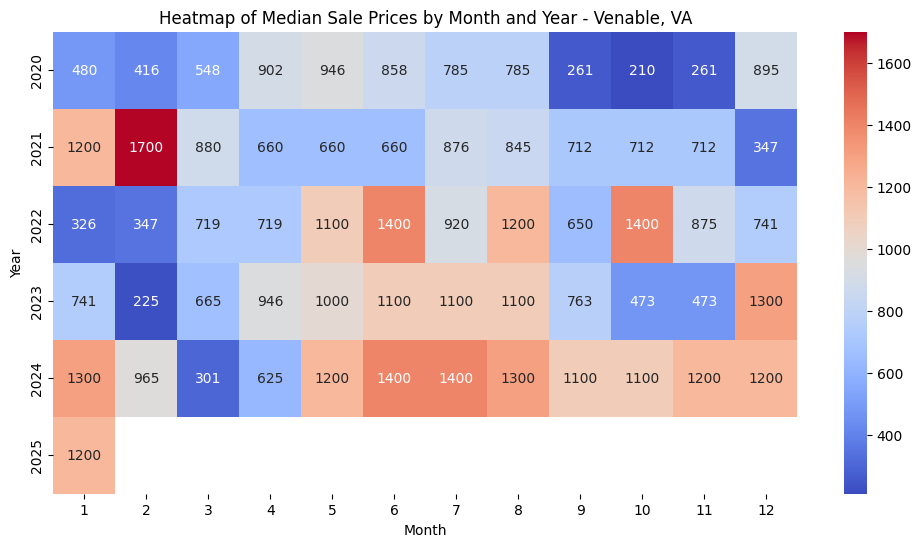

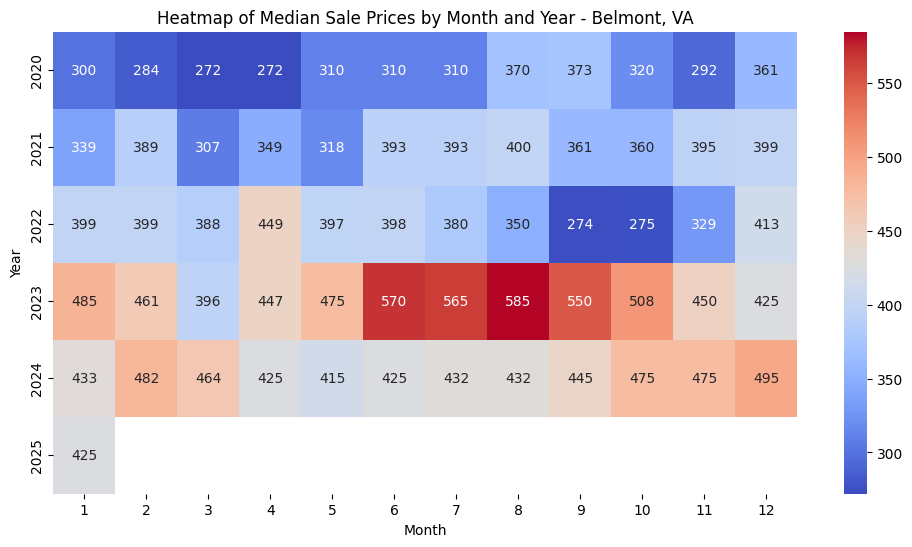

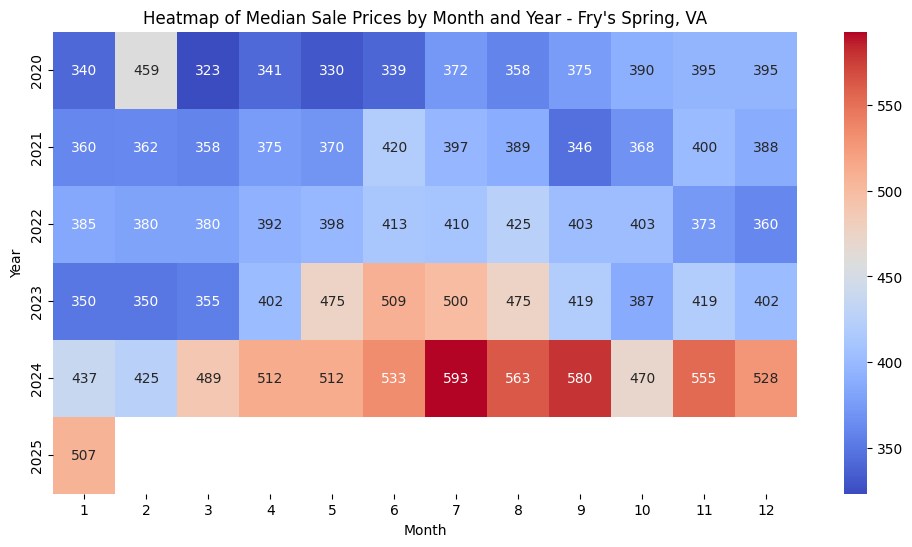

In [10]:
# Heat map of median price over months by each location
locations = df["Location"].unique()

# Create new map for each loccation (Nieghborhoods and Cville)
for location in locations:
    df_n = df[df["Location"] == location]
    pivot_table = df_n.pivot_table(index="Year", columns="Month", values="Median Sale Price", aggfunc="mean")

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
    plt.title(f"Heatmap of Median Sale Prices by Month and Year - {location}")
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.show()


In [11]:
# Extract the name of the month from DateTime object

df['Month'] = df['Date'].dt.month_name()

In [12]:
# Grouping Median Sale Price by Month

monthly_median = df.groupby(['Month'])['Median Sale Price'].median().reset_index()

In [13]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_median['Month'] = pd.Categorical(monthly_median['Month'], categories=month_order, ordered=True)

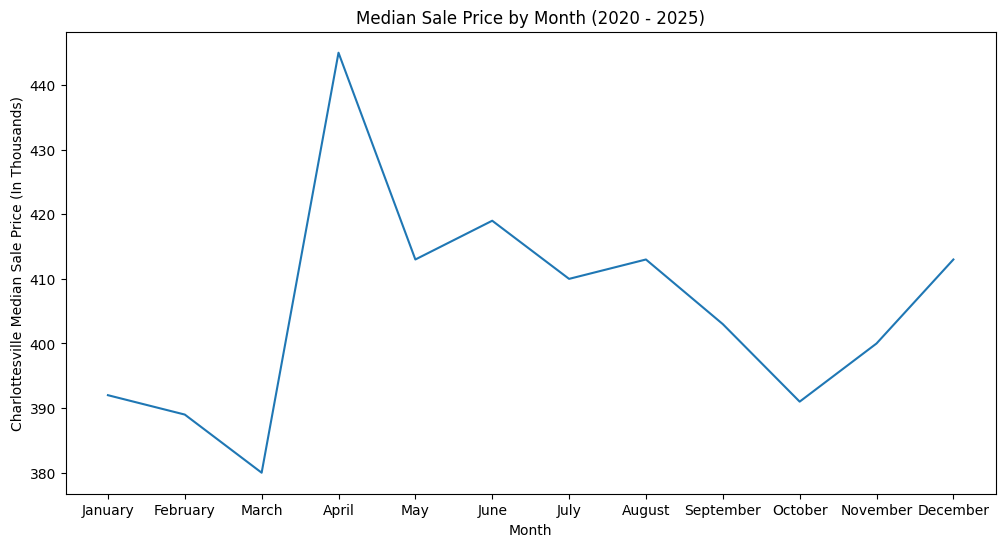

In [14]:
# Making a scatterplot of Median Sale Price by Month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_median, x='Month', y='Median Sale Price')
plt.title('Median Sale Price by Month (2020 - 2025)')
plt.xlabel('Month')
plt.ylabel('Charlottesville Median Sale Price (In Thousands)')
plt.show()